In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import random

In [ ]:
#IMPLEMENT DENSITY CALC & PLOT (n=psi^2)
#VARIABLE PARAMETERS (4/29)

# Define Functions

In [3]:
def calc_s0(psi_init, h, m, g, mu, k, x_max, x_min, steps,x_vec,temp,potential):
    
    beta=1/k*temp

    #laplacian
    laps=[]
    for i in range(1,len(psi_init)-1):
        laplacian=-h**2/(2*m)*(psi_init[i+1]-2*psi_init[i]+psi_init[i-1])*psi_init[i]/((x_max-x_min)/steps)**2
        laps.append(laplacian.copy())
    laps_term=laps*np.conjugate(psi_init[1:-1])
    laps_int=integrate.simpson(laps_term, x=x_vec[1:-1])
    print("Laplacian Term: ", laps_int)

    #Potential term
    potential_term=potential*np.conjugate(psi_init)*psi_init
    potential_integrate=integrate.simpson(potential_term, x=x_vec)
    print("Potential Term: ", potential_integrate)

    #Norm^4
    norm4=(np.conjugate(psi_init)*psi_init)**2
    #print(norm4)
    norm4_term=integrate.simpson(norm4, x=x_vec)
    print("Norm^4 Term: ", norm4_term)

    #Norm^2 (part of number operation)
    norm2=np.conjugate(psi_init)*psi_init #I feel like this needs to explicitly be something times complex conj...
    norm2_term=integrate.simpson(norm2, x=x_vec)
    print("Norm^2 Term: ", norm2_term)

    S_0=-beta*(-laps_int+potential_integrate+(g/2)*norm4_term)-mu*norm2_term 
    #print(S_0)

    return S_0

In [4]:
def check_func(s0_final, s0_init, psi_new,psi_old):
    a=np.exp(s0_final-s0_init)
    print("value of a is: ", a)

    if a>=1:
        pass
        print("a does not meet acceptance criteria. Perturbation rejected.")
        accepted_s=s0_init
        psi_out=psi_old
    if a<1:
        rand=random.random() #generate random number between 0,1
        print("rand value is: ",rand)
        if rand<=a:
            psi_out=psi_new
            print("a meets acceptance criteria. Perturbation accepted.")
            accepted_s=s0_final
        else:
            pass
            print("a meets acceptance criteria. Perturbation rejected.")
            accepted_s=s0_init
            psi_out=psi_old
    return accepted_s, psi_out

In [ ]:
def loop_stochastic(h, m, g, k, mu, c1, c2, c3, v, phi, u, x_max, x_min, nsteps, xgrid, initial_wave_func, potential_func, iterations, temp):

    #Define initial and boundary conditions
    iter=0
    entropy_store=[]
    psi_store=[]
    psi_sq_store=[]
    psi_store.append(initial_wave_func.copy())

    while iter<iterations:

        print("Iteration: ", iter)

        #calculate inital entropy
        s0_init=calc_s0(initial_wave_func, h, m, g, mu, k, x_max, x_min, nsteps,xgrid, temp, potential_func)
        print("Initial reduced entropy: ",s0_init)

        # PERTURBATION
        rand=random.choice([0,1])

        if rand==0:
            #print("Generating density perturbation...")
            psi=initial_wave_func*(1+c1*v*np.sin(k*xgrid+phi))
        if rand==1:
            #print("Generating phase perturbation...")
            psi=initial_wave_func*np.exp((1j*c2*v*np.sin(k*xgrid+phi)))

        # Vary particle number
        psi=(1+c3*u)*psi
        print("new psi is:",psi)

        # Calculate reduced energy of perturbed field
        s0_final=calc_s0(psi, h, m, g, mu, k, x_max, x_min, nsteps,xgrid, temp, potential_func)
        print("Final reduced entropy: ", s0_final)

        # Accept or reject perturbation
        accepted_s, initial_wave_func=check_func(s0_final, s0_init, psi, initial_wave_func)
        entropy_store.append(accepted_s)
        psi_store.append(initial_wave_func)
        psi_sq=np.conjugate(initial_wave_func)*initial_wave_func
        psi_sq_store.append(psi_sq.copy())
        
        iter+=1
    return psi_store, psi_sq_store, entropy_store

# Run Code

In [11]:
#Define Constants
omega=1
hbar=1
mass=1
g_param=-1
k_boltz=1
mu_chem_potential=1
#N_iterations=10
c1_val=1
c2_val=1
c3_val=1
v_val=1
phase=1
u=1

#Construct grid
x_start=-5
x_end=5
num_steps=100
grid=np.linspace(x_start,x_end, num_steps)

#Construct potential and initial wave function
psi_0=(1/np.pi**.25)*np.exp(-0.5*grid**2)
V=grid**2/2

#Define run parameters
iterations=10
temperature=1

In [ ]:
psi_array, psi_sq_array, entropy_array=loop_stochastic(hbar, mass, g_param, k_boltz, mu_chem_potential, c1_val, c2_val, c3_val, v_val, phase, u, x_end, x_start, num_steps, grid, psi_0, V, iterations, temperature)

Iteration:  0
Laplacian Term:  0.2082269543852865
Potential Term:  0.24999999997908753
Norm^4 Term:  0.3989422804014328
Norm^2 Term:  0.9999999999983733
Initial reduced entropy:  -0.842301905391458
new psi is: [9.83522825e-06 1.55707686e-05 2.42536001e-05 3.71584355e-05
 5.59762465e-05 8.28774960e-05 1.20543265e-04 1.72134575e-04
 2.41160549e-04 3.31198017e-04 4.45411960e-04 5.85832814e-04
 7.52369036e-04 9.41579122e-04 1.14530349e-03 1.34936954e-03
 1.53273497e-03 1.66762089e-03 1.72139421e-03 1.66116207e-03
 1.46220119e-03 1.12140905e-03 6.76870394e-04 2.34317390e-04
 6.70230876e-07 3.23945415e-04 1.73762024e-03 5.00610786e-03
 1.11664573e-02 2.15599445e-02 3.78461188e-02 6.19914007e-02
 9.62247761e-02 1.42954713e-01 2.04644265e-01 2.83645344e-01
 3.81998108e-01 5.01206856e-01 6.42009073e-01 8.04158598e-01
 9.86246534e-01 1.18558370e+00 1.39816587e+00 1.61873741e+00
 1.84096088e+00 2.05768982e+00 2.26133137e+00 2.44427445e+00
 2.59935105e+00 2.72029231e+00 2.80213985e+00 2.84157520e+

# Plotting

[-0.842301905391458, -0.842301905391458, -0.842301905391458, -0.842301905391458, -0.842301905391458, -0.842301905391458, -0.842301905391458, -0.842301905391458, -0.842301905391458, -0.842301905391458]


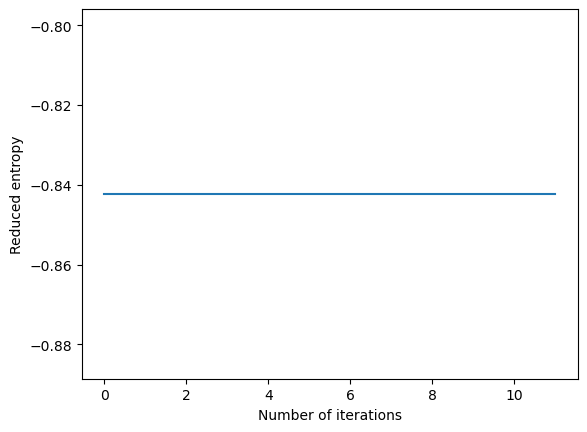

In [16]:
#Plot Reduced Entropy

print(entropy_array)
fig=plt.figure()
plt.plot(np.linspace(0,iterations+1,iterations), entropy_array)
plt.xlabel("Number of iterations")
plt.ylabel("Reduced entropy")
#plt.xlim(0,20)
plt.show()

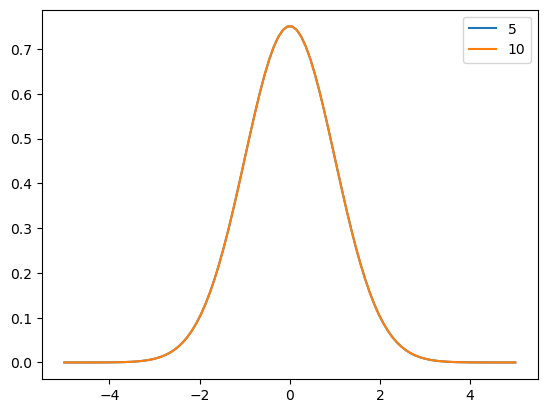

In [14]:
# Plot Psi

plt.figure()
#plt.plot(grid, np.real(psi_store[0]), label="0")
plt.plot(grid, np.real(psi_array[5]), label="5")
plt.plot(grid, np.real(psi_array[10]), label="10")
#plt.plot(grid, np.real(psi_store[15]), "--",label="15")
plt.legend()
plt.show()